### Угадываем пол спортсмена

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'athletes.csv' )
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


#### Попробуем угадать пол на основе роста, веса и вида спорта

In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [4]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

del X['sex']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )

### Строим модель и предсказания predictions

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
model=LogisticRegression()

In [8]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.35)


In [9]:
model.fit(x_train,y_train)

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
predict=model.predict_proba(x_test)
predict[:5]

array([[0.48815216, 0.51184784],
       [0.0763055 , 0.9236945 ],
       [0.07517574, 0.92482426],
       [0.07984641, 0.92015359],
       [0.06500807, 0.93499193]])

In [11]:
for line in zip( predict[:, 1], y_test ):
    print( line )

(0.5118478394057835, 1)
(0.9236945019718124, 1)
(0.9248242637424089, 1)
(0.9201535928604601, 1)
(0.9349919311121802, 1)
(0.09956051012462688, 0)
(0.6435259407427786, 0)
(0.6522567068299556, 1)
(0.5763648418338625, 1)
(0.5374695160564456, 1)
(0.09602441405727749, 0)
(0.9727279318051885, 1)
(0.4622241502860544, 1)
(0.8294520887112311, 1)
(0.4519493509346186, 1)
(0.061393006259002555, 0)
(0.2666341959341926, 0)
(0.34942044051283133, 1)
(0.08672882835196788, 0)
(0.5341965290719983, 1)
(0.3323666900558065, 1)
(0.8097259241727968, 1)
(0.2522830864491849, 0)
(0.660718477707386, 1)
(0.8598881059053353, 1)
(0.6625642171330981, 1)
(0.828094911102156, 0)
(0.7621787973689065, 1)
(0.48671468433521786, 0)
(0.8628035869864046, 1)
(0.775199868229573, 1)
(0.2384660786195391, 0)
(0.7532228349267487, 1)
(0.1270327142990181, 1)
(0.440191812085708, 1)
(0.32803316553358064, 0)
(0.956872776835113, 1)
(0.2928717913483648, 0)
(0.28694264593881014, 1)
(0.9741135600370096, 1)
(0.9785015382621808, 1)
(0.972384547

### По значениям y_test и predictions считаем precision-recall и ROC

In [12]:
from sklearn.metrics import roc_curve, precision_recall_curve

import pylab as pl
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [13]:
pr, re, thres = precision_recall_curve( y_test, predict[:, 1] )

In [14]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.5369639568534597, 1.0, 0.004182148231630122)
(0.5371052631578948, 1.0, 0.007322723944325466)
(0.5372466438536457, 1.0, 0.007341578381565046)
(0.5373880989994734, 1.0, 0.008965447872091562)
(0.5375296286542007, 1.0, 0.011346084322322982)
(0.5376712328767124, 1.0, 0.012858400661077756)
(0.5378129117259552, 1.0, 0.01415850134213428)
(0.5379546652609383, 1.0, 0.014721702988531845)
(0.538096493540733, 1.0, 0.015404302882365108)
(0.5382383966244726, 1.0, 0.015506995650467644)
(0.5383803745713532, 1.0, 0.01574928816329804)
(0.5385224274406333, 1.0, 0.016355076559721984)
(0.5388067581837381, 1.0, 0.016696832232180263)
(0.5389490361763929, 1.0, 0.01926894328020142)
(0.5390913893291073, 1.0, 0.019580049464451656)
(0.5392338177014531, 1.0, 0.01969874706473756)
(0.5393763213530656, 1.0, 0.020016163095705638)
(0.5395189003436426, 1.0, 0.020996528478878167)
(0.5396615547329455, 1.0, 0.02132712499402106)
(0.5398042845807988, 1.0, 0.021544412245092934)
(0.53994708994709, 1.0, 0.021956771479435436)


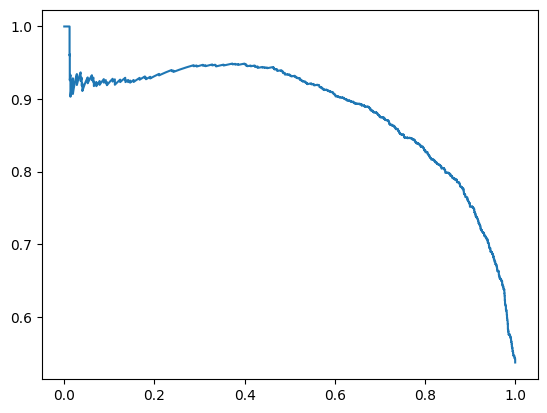

In [15]:
import matplotlib.pyplot as plt
plt.plot( re, pr )
